In [30]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data=pd.read_csv("C:\\Users\\hp\\Downloads\\clean_data.csv")

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In [33]:
data.describe()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
count,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.422804,2.182614,27.270059,1.812282e+05,43.784093,5.664730,0.132145
std,4.080270e+04,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.767019,0.932918,16.648057,9.927731e+04,11.625768,6.342241,0.338666
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000
25%,5.036955e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,0.000000
50%,5.069449e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,0.000000
75%,5.112986e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,0.000000
max,5.150479e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,1.000000


In [34]:
data.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [35]:
data.tail()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
9704,5148694,0,0,0,0,0,0,0,0,2,20,180000.0,56.400884,0.542106,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,Laborers,1
9705,5149055,0,0,1,1,1,0,0,0,2,19,112500.0,43.360233,7.375921,Commercial associate,Secondary / secondary special,Married,House / apartment,Other,1
9706,5149729,1,1,1,0,0,0,0,0,2,21,90000.0,52.296762,4.711938,Working,Secondary / secondary special,Married,House / apartment,Other,1
9707,5149838,0,0,1,0,1,1,0,0,2,32,157500.0,33.914454,3.627727,Pensioner,Higher education,Married,House / apartment,Medicine staff,1
9708,5150337,1,0,1,0,0,0,0,0,1,13,112500.0,25.155890,3.266323,Working,Secondary / secondary special,Single / not married,Rented apartment,Laborers,1


In [36]:
data.columns = list(map(lambda a: a.lstrip(), data.columns))

In [37]:
data.isnull().sum()

ID                 0
Gender             0
Own_car            0
Own_property       0
Work_phone         0
Phone              0
Email              0
Unemployed         0
Num_children       0
Num_family         0
Account_length     0
Total_income       0
Age                0
Years_employed     0
Income_type        0
Education_type     0
Family_status      0
Housing_type       0
Occupation_type    0
Target             0
dtype: int64

In [38]:
data.shape

(9709, 20)

In [39]:
data.describe()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
count,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.422804,2.182614,27.270059,1.812282e+05,43.784093,5.664730,0.132145
std,4.080270e+04,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.767019,0.932918,16.648057,9.927731e+04,11.625768,6.342241,0.338666
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000
25%,5.036955e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,0.000000
50%,5.069449e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,0.000000
75%,5.112986e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,0.000000
max,5.150479e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,1.000000


In [40]:
data['Target'].value_counts()

0    8426
1    1283
Name: Target, dtype: int64

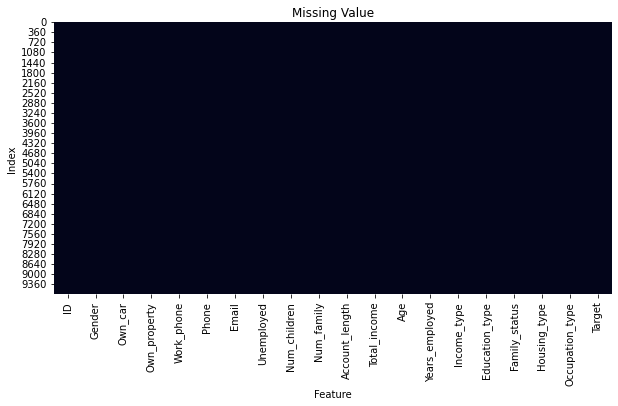

In [41]:
plt.subplots(figsize=(10,5))
sns.heatmap(data.isnull(),cbar=False)
plt.xlabel('Feature')
plt.ylabel('Index')
plt.title('Missing Value')

plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


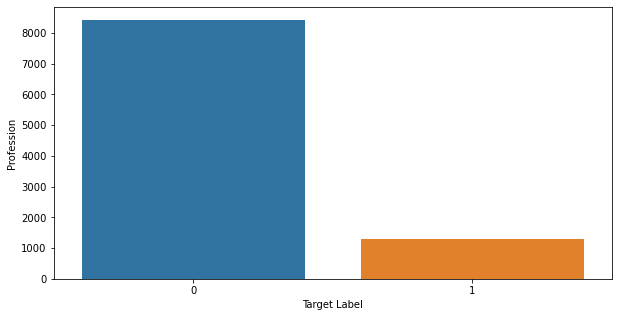

In [42]:
plt.subplots(figsize=(10,5))
sns.countplot(data['Target'].sort_values())
plt.xlabel('Target Label')
plt.ylabel('Profession')

plt.show()

In [43]:
data.dtypes

ID                   int64
Gender               int64
Own_car              int64
Own_property         int64
Work_phone           int64
Phone                int64
Email                int64
Unemployed           int64
Num_children         int64
Num_family           int64
Account_length       int64
Total_income       float64
Age                float64
Years_employed     float64
Income_type         object
Education_type      object
Family_status       object
Housing_type        object
Occupation_type     object
Target               int64
dtype: object

In [44]:
stats = data.select_dtypes(['float', 'int64']).drop(columns=['Total_income'])

Text(0.5, 1.0, 'Correlation Factors Heat Map')

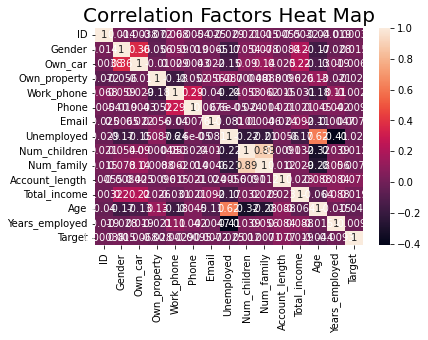

In [45]:
sns.heatmap(data.corr(), annot=True).set_title('Correlation Factors Heat Map', color='black', size='20')

In [48]:
data_final = pd.get_dummies(data)
data_final.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,...,Occupation_type_Low-skill Laborers,Occupation_type_Managers,Occupation_type_Medicine staff,Occupation_type_Other,Occupation_type_Private service staff,Occupation_type_Realty agents,Occupation_type_Sales staff,Occupation_type_Secretaries,Occupation_type_Security staff,Occupation_type_Waiters/barmen staff
0,5008804,1,1,1,1,0,0,0,0,2,...,0,0,0,1,0,0,0,0,0,0
1,5008806,1,1,1,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,1,0
2,5008808,0,0,1,0,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,5008812,0,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
4,5008815,1,1,1,1,1,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0


In [50]:
X = data_final.drop(columns=['Total_income'])
y = data_final['Total_income']

In [58]:
data.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
clf=RandomForestClassifier(n_estimators=100)

KeyError: 'Years Employed'

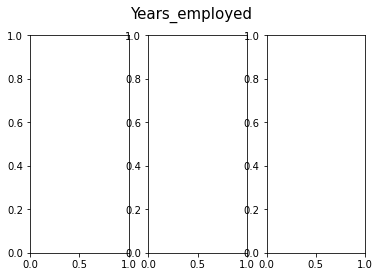

In [68]:
fig, ax = plt.subplots(1,3)
fig.suptitle("Years_employed", fontsize=15)
sns.distplot(data["Years Employed"], ax=ax[0])
sns.boxplot(data["Years Employed"], ax=ax[1])
sns.violinplot(data["Years Employed"], ax=ax[2])


In [69]:
num_atribute=['Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone' , 'Email', 'Unemployed', 'Num_children', 'Num_family']

cat_atribute=['Years_employed', 'Income_type', 'Education_type', 'Family_status', 'Housing_type', 'Occupation_type' ]

In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [72]:
data['Target']= le.fit_transform(data['Target'])

In [73]:
X= data.drop(['Target'], axis=1)
y= data['Target']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [74]:
X_train[cat_atribute].head()

,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type
4537,9.467682,Commercial associate,Higher education,Married,House / apartment,Other
3426,7.384135,Working,Secondary / secondary special,Married,House / apartment,Managers
6672,14.595782,Working,Higher education,Married,With parents,Cleaning staff
8853,13.180284,Commercial associate,Higher education,Separated,House / apartment,Managers
823,1.971293,Commercial associate,Secondary / secondary special,Married,House / apartment,Managers


In [75]:
X_train[cat_atribute] = X_train[cat_atribute].apply(le.fit_transform)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [76]:
X_train[cat_atribute].head()

,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type
4537,1903,0,1,1,1,12
3426,1586,4,4,1,1,10
6672,2422,4,1,1,5,1
8853,2310,0,1,2,1,10
823,436,0,4,1,1,10


In [77]:
ss = StandardScaler()
ss.fit_transform(X_train[num_atribute])

array([[-0.72726122,  1.32720725, -1.43044316, ..., -0.46260675,
        -0.54976873, -0.19361772],
       [ 1.37502175,  1.32720725,  0.69908405, ..., -0.46260675,
         2.05115593,  1.94419871],
       [-0.72726122, -0.75346183,  0.69908405, ..., -0.46260675,
         0.7506936 ,  0.8752905 ],
       ...,
       [ 1.37502175,  1.32720725,  0.69908405, ..., -0.46260675,
        -0.54976873, -0.19361772],
       [-0.72726122, -0.75346183, -1.43044316, ..., -0.46260675,
         0.7506936 ,  0.8752905 ],
       [-0.72726122, -0.75346183,  0.69908405, ..., -0.46260675,
        -0.54976873, -0.19361772]])

In [78]:
a = X_train[cat_atribute]
b = ss.transform(X_train[num_atribute])

Xtr = np.hstack([a,b])
Xtr.shape 

(6796, 15)

In [79]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean')

In [80]:
ss = StandardScaler()
ss.fit_transform(X_test[num_atribute])
le = LabelEncoder()
X_test[cat_atribute] = X_test[cat_atribute].apply(le.fit_transform)
a1 = X_test[cat_atribute]
b1 = ss.transform(X_test[num_atribute])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape 

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(2913, 15)

In [81]:
y_pred = knn.predict(Xtr1)

In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2475,   56],
       [ 373,    9]], dtype=int64)

In [84]:
from sklearn.metrics import accuracy_score

In [85]:
accuracy_score(y_test, y_pred)

0.8527291452111225

In [86]:
from sklearn.metrics import precision_recall_fscore_support

In [87]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.8690309 , 0.13846154]),
 array([0.97787436, 0.02356021]),
 array([0.9202454 , 0.04026846]),
 array([2531,  382], dtype=int64))

In [88]:
from sklearn.metrics import precision_score

In [89]:
precision_score(y_test, y_pred)

0.13846153846153847

In [90]:
from sklearn.metrics import recall_score

In [91]:
recall_score(y_test, y_pred)

0.02356020942408377

In [92]:
from sklearn.metrics import f1_score

In [93]:
f1_score(y_test, y_pred)

0.04026845637583893

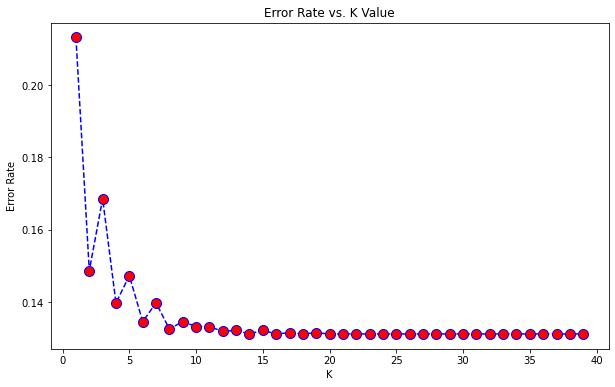

Minimum error:- 0.13113628561620327 at K = 14


In [94]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(Xtr,y_train)
 pred_i = knn.predict(Xtr1)
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [95]:
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [96]:
y_pred = knn.predict(Xtr1)


In [97]:
accuracy_score(y_test, y_pred)

0.865430827325781